# Class1 June 7th

### 图片对比方法
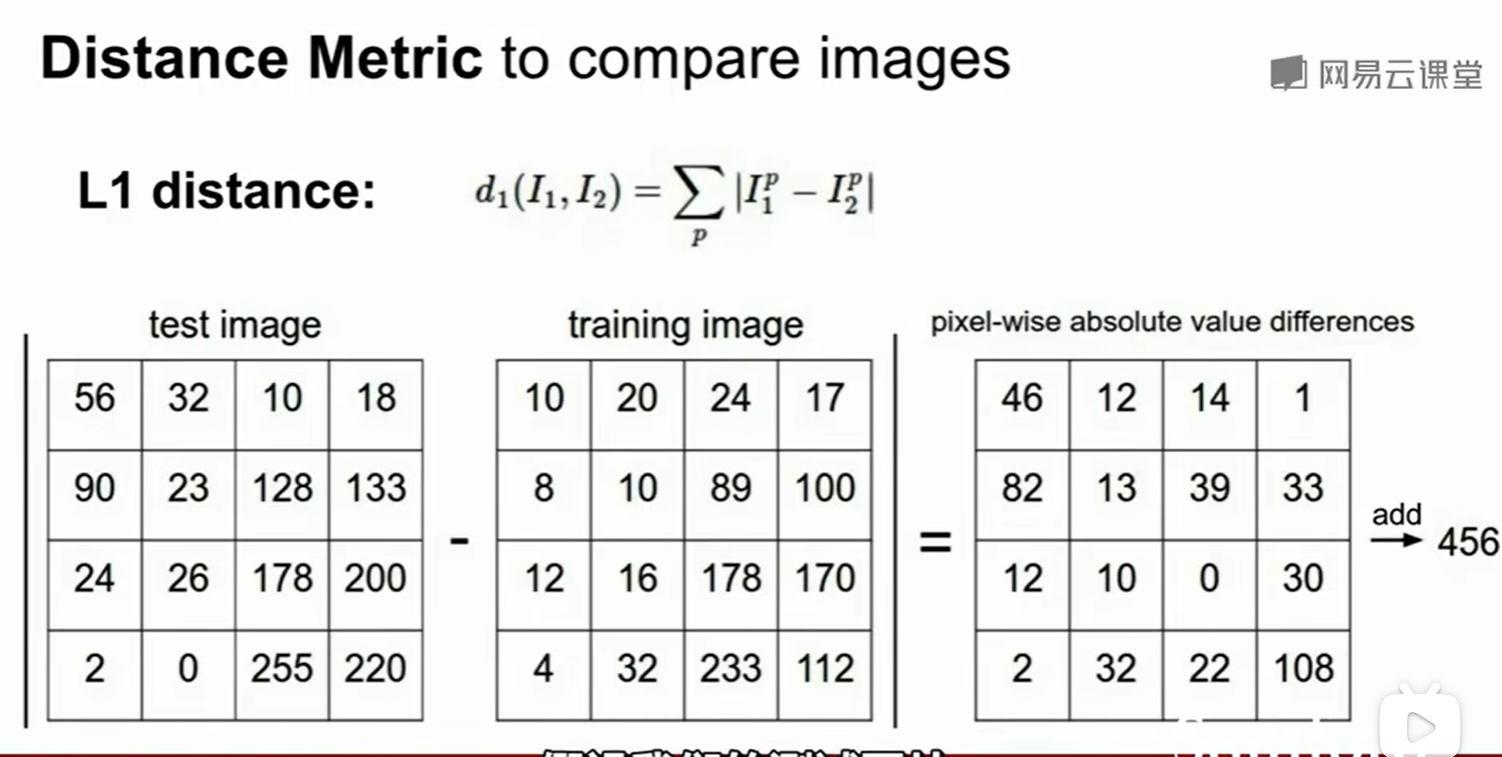
l1距离，将两个矩阵之间的像素差求和

In [1]:
import numpy as np

class NearestNeighbor:
    def __init__(self):
        pass
    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply stores the training data
        self.Xtr = X
        self.ytr = y
    def predict(self,X):
        """" X is N x D where each row is an example we wish to predict label for """
        # 返回了测试集合的行数
        num_test = X.shape[0]
        """创建一个一样大小的0矩阵，同时数据类型保持一致"""
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        for i in range(num_test):
            # axis = 1 表示按行计算，axis = 0 表示按列计算
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
            min_index = np.argmin(distances)
            Ypred[i] = self.ytr[min_index]
        return Ypred
            

解释下上面的代码，训练数据中self.Xtr = X为N $\times$ D维度，self.ytr = y是一个N $\times$ 1的向量，记录的是每一行的预测结果。train函数中，将传入的矩阵进行distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)操作，其中np.abs(self.Xtr - X[i,:])使用广播操作进行扩展矩阵进行减法，axis保证求和是每一行的操作。找到的就是哪一行是最接近训练数据的。将结果中的最小值下标作为预测结果，结果再y_pred[min_idx]中。

L2欧氏距离，更适合generic的向量之间
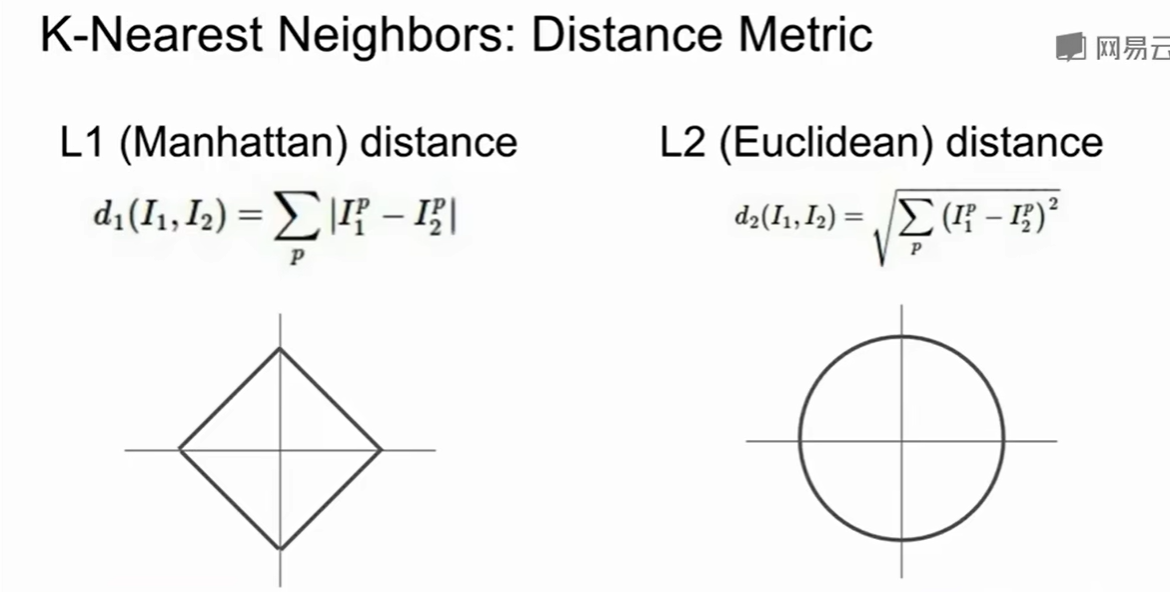

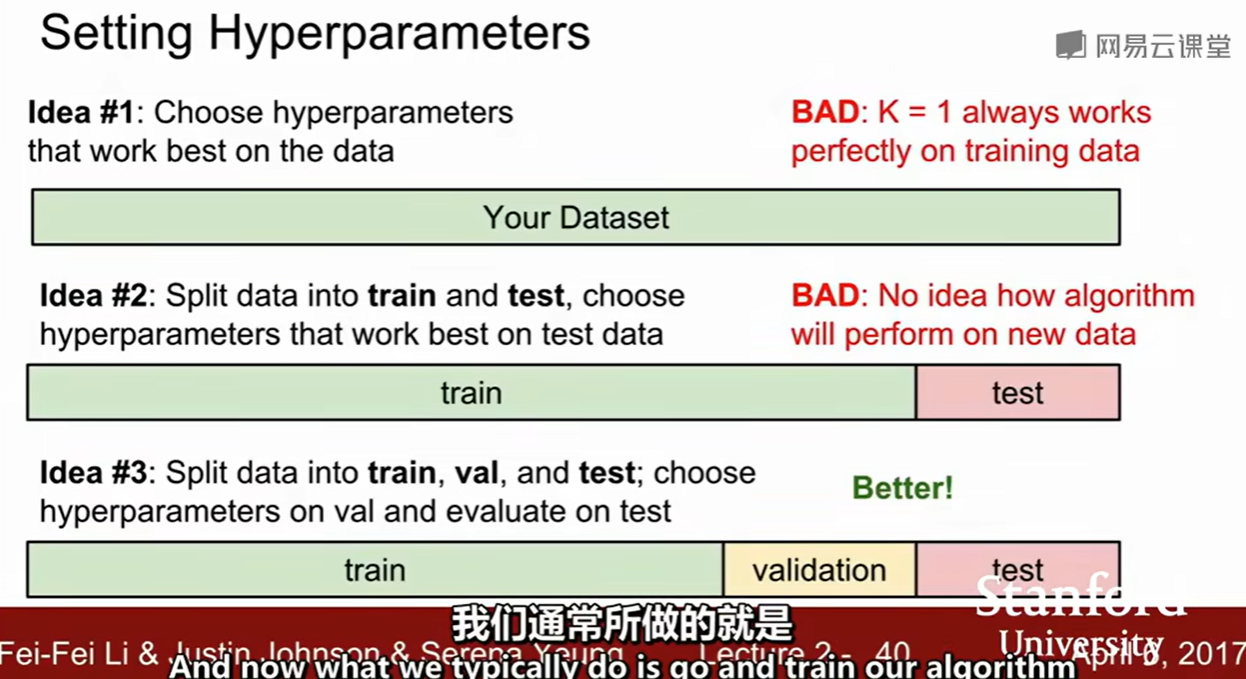
超参数的选择：

Idea #1 : 不好之处在于K=1总是最好

Idea #2 : 不好之处在于训练出来的模型总是拟合test这个部分，而不是其他，换一个test数据集就可能出问题

Idea #3 : 在train数据集上训练，val集合上验证准确性，最后在test上测试。因为参数是根据val调整的，所以对于test来说这是一个新的数据集，表现最为合理。 

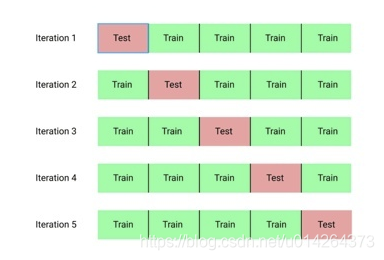

K折交叉验证的方式也是可行的，用在数据量小的时候

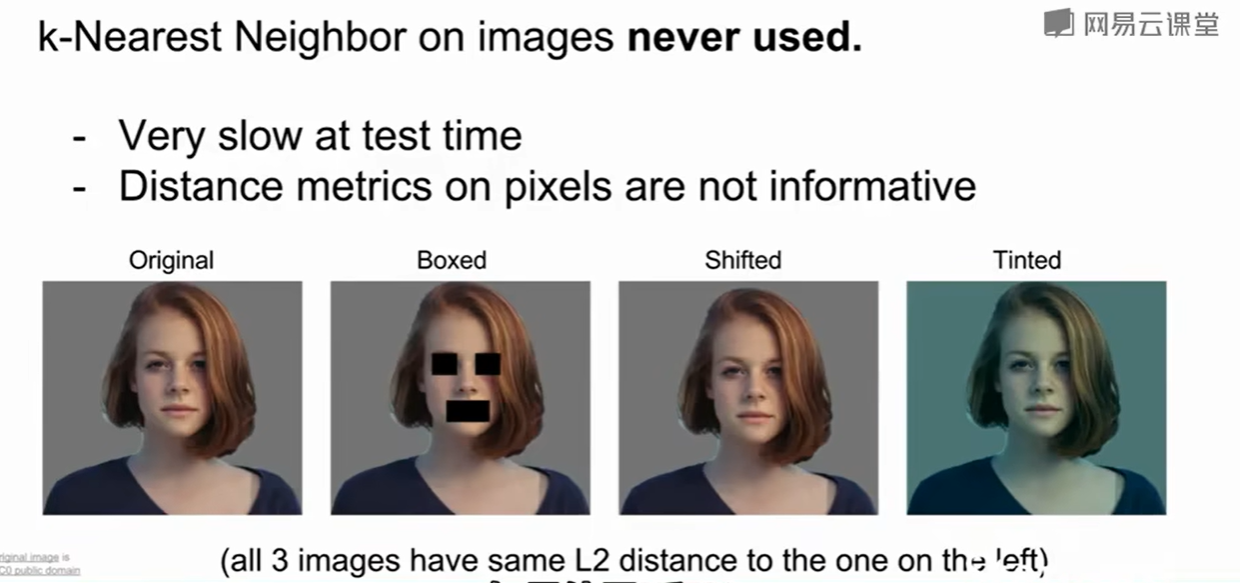
L2距离不能很好反映图像之间的相似度，这张图的original和其他之间都有着相同的L2距离(On purposed),因此不能反映图像之间的相似度。

```python
from .k_nearest_neighbor import *
from .linear_classifier import *

```
使得我们可以直接导入 k_nearest_neighbor中的class而不用去单独找，这就是init.py的作用

```python

np.argsort(np.array([3,2,1]))
# 返回的是索引[0,1,2],最小值的排序后索引
np.bincount(np.array([0,1,1,2,2,2]))
# 返回的是每个数字出现的次数,[1,2,3]
np.array_split(np.array([1,2,3,4,5,6]), 2)
# 可以将数据集划分n个份，返回的是一个list，不能整除也能划分

```
